# FLIGHT DELAY PREDICTION - PYTHON

# **TEAM MEMBERS**

**HARINI GOKULRAM NAIDU - 19MIA1004**

**SHIVANI GOKULRAM NAIDU - 19MIA1006**

**P SUBHASHRI - 19MIA1008**

**DEEKSHITHA L - 19MIA1030**

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flight-delays/airports.csv
/kaggle/input/flight-delays/airlines.csv
/kaggle/input/flight-delays/flights.csv


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
low_memory=False

In [ ]:
# Store the path in variables
airlines_path = "../input/flight-delays/airlines.csv"
airport_path = "../input/flight-delays/airports.csv"
flights_path = "../input/flight-delays/flights.csv"

# Load the data
airlines_data = pd.read_csv(airlines_path)
airport_data = pd.read_csv(airport_path)
flights_data = pd.read_csv(flights_path)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3524: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
airlines_data.head()

IATA_CODE                 AIRLINE
0        UA   United Air Lines Inc.
1        AA  American Airlines Inc.
2        US         US Airways Inc.
3        F9  Frontier Airlines Inc.
4        B6         JetBlue Airways

In [ ]:
airport_data.head()

IATA_CODE                              AIRPORT         CITY STATE COUNTRY  \
0       ABE  Lehigh Valley International Airport    Allentown    PA     USA   
1       ABI             Abilene Regional Airport      Abilene    TX     USA   
2       ABQ    Albuquerque International Sunport  Albuquerque    NM     USA   
3       ABR            Aberdeen Regional Airport     Aberdeen    SD     USA   
4       ABY   Southwest Georgia Regional Airport       Albany    GA     USA   

   LATITUDE  LONGITUDE  
0  40.65236  -75.44040  
1  32.41132  -99.68190  
2  35.04022 -106.60919  
3  45.44906  -98.42183  
4  31.53552  -84.19447

In [ ]:
flights_data['DEPARTURE_DELAY'].max()

1988.0

In [ ]:
flights_data.head()

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0  2015      1    1            4      AS             98      N407AS   
1  2015      1    1            4      AA           2336      N3KUAA   
2  2015      1    1            4      US            840      N171US   
3  2015      1    1            4      AA            258      N3HYAA   
4  2015      1    1            4      AS            135      N527AS   

  ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  ARRIVAL_TIME  \
0            ANC                 SEA                    5  ...         408.0   
1            LAX                 PBI                   10  ...         741.0   
2            SFO                 CLT                   20  ...         811.0   
3            LAX                 MIA                   20  ...         756.0   
4            SEA                 ANC                   25  ...         259.0   

   ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  AIR_SYSTEM_DELAY  \
0          -22.0         0          0                  NaN               NaN   
1           -9.0         0          0                  NaN               NaN   
2            5.0         0          0                  NaN               NaN   
3           -9.0         0          0                  NaN               NaN   
4          -21.0         0          0                  NaN               NaN   

   SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  WEATHER_DELAY  
0             NaN            NaN                  NaN            NaN  
1             NaN            NaN                  NaN            NaN  
2             NaN            NaN                  NaN            NaN  
3             NaN            NaN                  NaN            NaN  
4             NaN            NaN                  NaN            NaN  

[5 rows x 31 columns]

In [ ]:
flights_data.shape

(5819079, 31)

In [ ]:
#lets take a segment of this data for now 
flights_seg = flights_data[0:50000]
flights_seg

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0      2015      1    1            4      AS             98      N407AS   
1      2015      1    1            4      AA           2336      N3KUAA   
2      2015      1    1            4      US            840      N171US   
3      2015      1    1            4      AA            258      N3HYAA   
4      2015      1    1            4      AS            135      N527AS   
...     ...    ...  ...          ...     ...            ...         ...   
49995  2015      1    4            7      AA           1524      N499AA   
49996  2015      1    4            7      AA           2316      N3FNAA   
49997  2015      1    4            7      AS              5      N566AS   
49998  2015      1    4            7      DL            688      N893AT   
49999  2015      1    4            7      DL            972      N130DL   

      ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  \
0                ANC                 SEA                    5  ...   
1                LAX                 PBI                   10  ...   
2                SFO                 CLT                   20  ...   
3                LAX                 MIA                   20  ...   
4                SEA                 ANC                   25  ...   
...              ...                 ...                  ...  ...   
49995            DFW                 LAS                  915  ...   
49996            STX                 MIA                  915  ...   
49997            DCA                 LAX                  915  ...   
49998            ATL                 ICT                  915  ...   
49999            MSP                 LAX                  915  ...   

       ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  \
0             408.0          -22.0         0          0                  NaN   
1             741.0           -9.0         0          0                  NaN   
2             811.0            5.0         0          0                  NaN   
3             756.0           -9.0         0          0                  NaN   
4             259.0          -21.0         0          0                  NaN   
...             ...            ...       ...        ...                  ...   
49995        1010.0            0.0         0          0                  NaN   
49996        1126.0            4.0         0          0                  NaN   
49997        1247.0           37.0         0          0                  NaN   
49998        1037.0           -3.0         0          0                  NaN   
49999        1135.0           10.0         0          0                  NaN   

       AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  \
0                   NaN             NaN            NaN                  NaN   
1                   NaN             NaN            NaN                  NaN   
2                   NaN             NaN            NaN                  NaN   
3                   NaN             NaN            NaN                  NaN   
4                   NaN             NaN            NaN                  NaN   
...                 ...             ...            ...                  ...   
49995               NaN             NaN            NaN                  NaN   
49996               NaN             NaN            NaN                  NaN   
49997              37.0             0.0            0.0                  0.0   
49998               NaN             NaN            NaN                  NaN   
49999               NaN             NaN            NaN                  NaN   

       WEATHER_DELAY  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN  
...              ...  
49995            NaN  
49996            NaN  
49997            0.0  
49998            NaN  
49999            NaN  

[50000 rows x 31 columns]

In [ ]:
flights_seg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 50000 non-null  int64  
 1   MONTH                50000 non-null  int64  
 2   DAY                  50000 non-null  int64  
 3   DAY_OF_WEEK          50000 non-null  int64  
 4   AIRLINE              50000 non-null  object 
 5   FLIGHT_NUMBER        50000 non-null  int64  
 6   TAIL_NUMBER          49941 non-null  object 
 7   ORIGIN_AIRPORT       50000 non-null  object 
 8   DESTINATION_AIRPORT  50000 non-null  object 
 9   SCHEDULED_DEPARTURE  50000 non-null  int64  
 10  DEPARTURE_TIME       48896 non-null  float64
 11  DEPARTURE_DELAY      48896 non-null  float64
 12  TAXI_OUT             48873 non-null  float64
 13  WHEELS_OFF           48873 non-null  float64
 14  SCHEDULED_TIME       50000 non-null  float64
 15  ELAPSED_TIME         48753 non-null 

In [ ]:
#year column is unneccesary since the data is bounded to 2015 but day and month are important
delay =[]
for row in flights_seg['ARRIVAL_DELAY']:
    if row > 60:
        delay.append(3)
    elif row > 30:
        delay.append(2)
    elif row > 15:
        delay.append(1)
    else:
        delay.append(0)  
flights_seg['delay'] = delay

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [ ]:
# 0 = On time/ before time/ not more than 15 mins of delay
# 1 = more than 15 mins and less than 30 mins of delay
# 2 = more than 30 mins and less than 1 hr of delay
# 3 = more than an hour of delay
flights_seg.value_counts('delay')

delay
0    35129
1     5580
2     5067
3     4224
dtype: int64

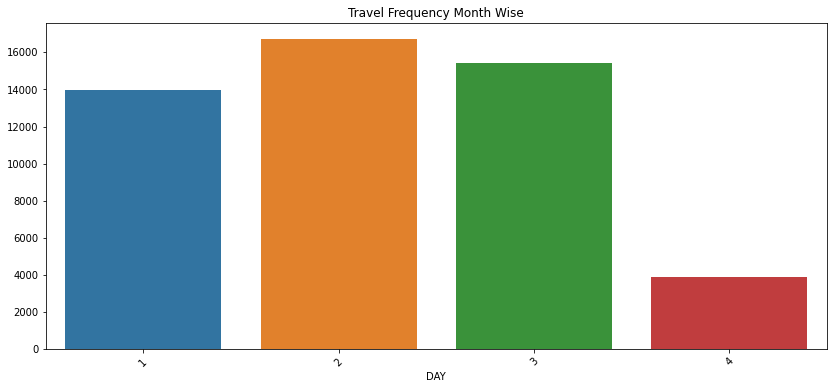

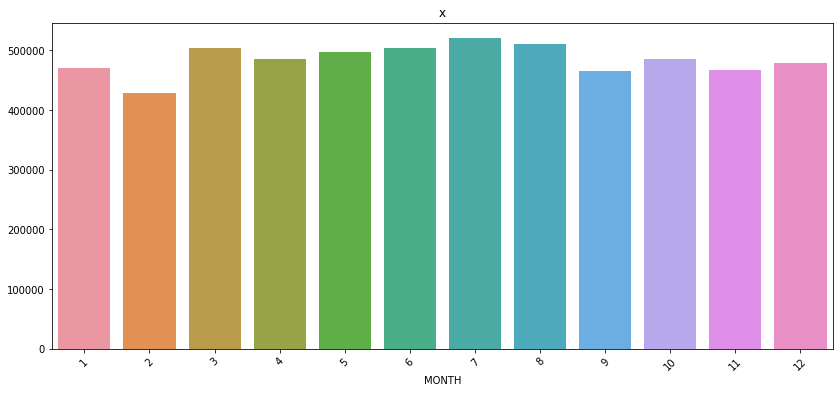

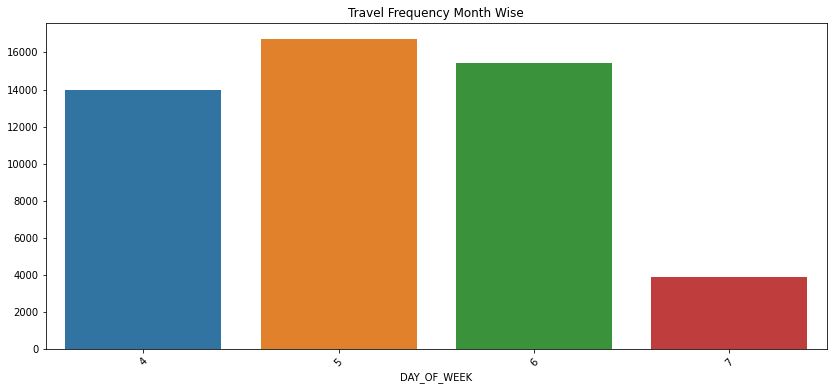

In [ ]:
def plot_bar(group, title):
    plt.figure(figsize=(14,6))
    sns.barplot(x=group.index,y=group.values)     
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()
plot_bar(flights_seg.value_counts('DAY'), 'Travel Frequency Month Wise')
plot_bar(flights_data.value_counts('MONTH'), 'x')
plot_bar(flights_seg.value_counts('DAY_OF_WEEK'), 'Travel Frequency Month Wise')

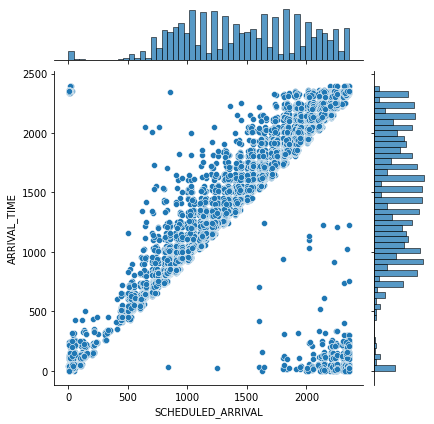

In [ ]:
sns.jointplot(data=flights_seg, x="SCHEDULED_ARRIVAL", y="ARRIVAL_TIME")

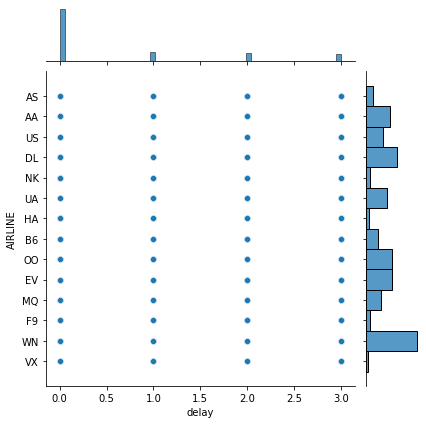

In [ ]:
sns.jointplot(data=flights_seg, y="AIRLINE", x="delay")

In [ ]:
Flight_data_delay =[]
for row in flights_data['ARRIVAL_DELAY']:
    if row > 60:
        Flight_data_delay.append(3)
    elif row > 30:
        Flight_data_delay.append(2)
    elif row > 15:
        Flight_data_delay.append(1)
    else:
        Flight_data_delay.append(0)  

In [ ]:
flights_data['Delay'] = Flight_data_delay

<AxesSubplot:>

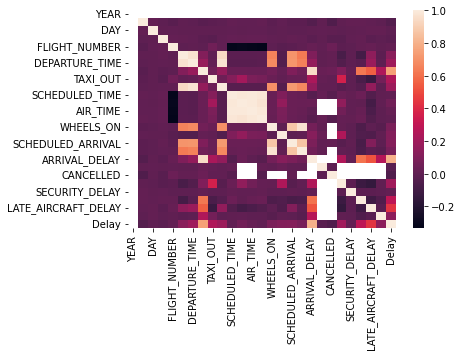

In [ ]:
sns.heatmap(flights_data.corr())

In [ ]:
flights_data=flights_data.drop(['YEAR','FLIGHT_NUMBER','AIRLINE','DISTANCE','TAIL_NUMBER','TAXI_OUT','SCHEDULED_TIME','DEPARTURE_TIME','WHEELS_OFF','ELAPSED_TIME','AIR_TIME','WHEELS_ON','DAY_OF_WEEK','TAXI_IN','CANCELLATION_REASON','ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', "CANCELLED"],
                                             axis=1)

In [ ]:
flights_data.describe()

MONTH           DAY  SCHEDULED_DEPARTURE  DEPARTURE_DELAY  \
count  5.819079e+06  5.819079e+06         5.819079e+06     5.732926e+06   
mean   6.524085e+00  1.570459e+01         1.329602e+03     9.370158e+00   
std    3.405137e+00  8.783425e+00         4.837518e+02     3.708094e+01   
min    1.000000e+00  1.000000e+00         1.000000e+00    -8.200000e+01   
25%    4.000000e+00  8.000000e+00         9.170000e+02    -5.000000e+00   
50%    7.000000e+00  1.600000e+01         1.325000e+03    -2.000000e+00   
75%    9.000000e+00  2.300000e+01         1.730000e+03     7.000000e+00   
max    1.200000e+01  3.100000e+01         2.359000e+03     1.988000e+03   

       SCHEDULED_ARRIVAL      DIVERTED  AIR_SYSTEM_DELAY  SECURITY_DELAY  \
count       5.819079e+06  5.819079e+06      1.063439e+06    1.063439e+06   
mean        1.493808e+03  2.609863e-03      1.348057e+01    7.615387e-02   
std         5.071647e+02  5.102012e-02      2.800368e+01    2.143460e+00   
min         1.000000e+00  0.000000e+00      0.000000e+00    0.000000e+00   
25%         1.110000e+03  0.000000e+00      0.000000e+00    0.000000e+00   
50%         1.520000e+03  0.000000e+00      2.000000e+00    0.000000e+00   
75%         1.918000e+03  0.000000e+00      1.800000e+01    0.000000e+00   
max         2.400000e+03  1.000000e+00      1.134000e+03    5.730000e+02   

       AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  WEATHER_DELAY         Delay  
count   1.063439e+06         1.063439e+06   1.063439e+06  5.819079e+06  
mean    1.896955e+01         2.347284e+01   2.915290e+00  3.394501e-01  
std     4.816164e+01         4.319702e+01   2.043334e+01  8.130325e-01  
min     0.000000e+00         0.000000e+00   0.000000e+00  0.000000e+00  
25%     0.000000e+00         0.000000e+00   0.000000e+00  0.000000e+00  
50%     2.000000e+00         3.000000e+00   0.000000e+00  0.000000e+00  
75%     1.900000e+01         2.900000e+01   0.000000e+00  0.000000e+00  
max     1.971000e+03         1.331000e+03   1.211000e+03  3.000000e+00

In [ ]:
flights_data=flights_data.fillna(flights_data.mean())

In [ ]:
flights_data.head(20)

MONTH  DAY  SCHEDULED_DEPARTURE  DEPARTURE_DELAY  SCHEDULED_ARRIVAL  \
0       1    1                    5            -11.0                430   
1       1    1                   10             -8.0                750   
2       1    1                   20             -2.0                806   
3       1    1                   20             -5.0                805   
4       1    1                   25             -1.0                320   
5       1    1                   25             -5.0                602   
6       1    1                   25             -6.0                526   
7       1    1                   30             14.0                803   
8       1    1                   30            -11.0                545   
9       1    1                   30              3.0                711   
10      1    1                   30             -6.0                523   
11      1    1                   35             -8.0                803   
12      1    1                   35              0.0                609   
13      1    1                   40             -6.0                615   
14      1    1                   40             -1.0                549   
15      1    1                   45             -4.0                509   
16      1    1                   45            -14.0                515   
17      1    1                   48             -6.0                626   
18      1    1                   50             -4.0                525   
19      1    1                   50             -5.0                603   

    DIVERTED  AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  \
0          0         13.480568        0.076154      18.969547   
1          0         13.480568        0.076154      18.969547   
2          0         13.480568        0.076154      18.969547   
3          0         13.480568        0.076154      18.969547   
4          0         13.480568        0.076154      18.969547   
5          0         13.480568        0.076154      18.969547   
6          0         13.480568        0.076154      18.969547   
7          0         13.480568        0.076154      18.969547   
8          0         13.480568        0.076154      18.969547   
9          0         13.480568        0.076154      18.969547   
10         0         13.480568        0.076154      18.969547   
11         0         13.480568        0.076154      18.969547   
12         0         13.480568        0.076154      18.969547   
13         0         13.480568        0.076154      18.969547   
14         0         13.480568        0.076154      18.969547   
15         0         13.480568        0.076154      18.969547   
16         0         13.480568        0.076154      18.969547   
17         0         13.480568        0.076154      18.969547   
18         0         13.480568        0.076154      18.969547   
19         0         13.480568        0.076154      18.969547   

    LATE_AIRCRAFT_DELAY  WEATHER_DELAY  Delay  
0             23.472838        2.91529      0  
1             23.472838        2.91529      0  
2             23.472838        2.91529      0  
3             23.472838        2.91529      0  
4             23.472838        2.91529      0  
5             23.472838        2.91529      0  
6             23.472838        2.91529      0  
7             23.472838        2.91529      0  
8             23.472838        2.91529      0  
9             23.472838        2.91529      0  
10            23.472838        2.91529      0  
11            23.472838        2.91529      0  
12            23.472838        2.91529      0  
13            23.472838        2.91529      0  
14            23.472838        2.91529      0  
15            23.472838        2.91529      0  
16            23.472838        2.91529      0  
17            23.472838        2.91529      0  
18            23.472838        2.91529      0  
19            23.472838        2.91529      0

<AxesSubplot:>

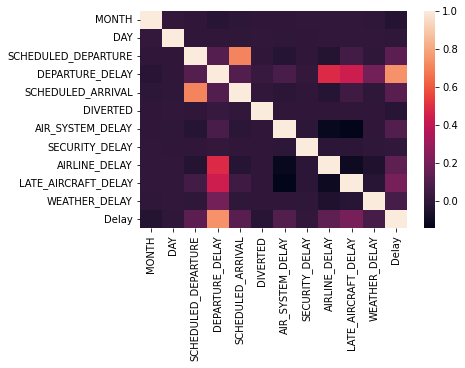

In [ ]:
sns.heatmap(flights_data.corr())

# **MODELS**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

In [ ]:
data = flights_data.values
X, y = data[:,:-1], data[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

In [ ]:
pred_prob = clf.predict_proba(X_test)
auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')
auc_score

0.9983084151208406

In [ ]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr = lr.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
pred_prob = lr.predict_proba(X_test)
lr.score(X_test, y_test)

0.9496123098496669

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf= rf.fit(X_train,y_train)

In [ ]:
pred_prob = rf.predict_proba(X_test)
rf.score(X_test, y_test)

0.999054260581856

In [ ]:
from time import time

In [ ]:
start_time = time() 

# Train a DecisionTree model
clf = DecisionTreeClassifier()


model = clf.fit(X_train,y_train)

end_time = time()
elapsed_time_clf = end_time - start_time
print("Time to train DecisionTree model: %.3f seconds" % elapsed_time_clf)

Time to train DecisionTree model: 11.998 seconds


In [ ]:
start_time = time() 

# Train a LogisticRegression model
lr = LogisticRegression()

model = lr.fit(X_train,y_train)

end_time = time()
elapsed_time_lr = end_time - start_time
print("Time to train LogisticRegression model: %.3f seconds" % elapsed_time_lr)

Time to train LogisticRegression model: 161.811 seconds


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
start_time = time() 

# Train a RandomForest model
rf = RandomForestClassifier() 

model = rf.fit(X_train,y_train)

end_time = time()
elapsed_time_rf = end_time - start_time
print("Time to train RandomForest model: %.3f seconds" % elapsed_time_rf)

Time to train RandomForest model: 327.073 seconds


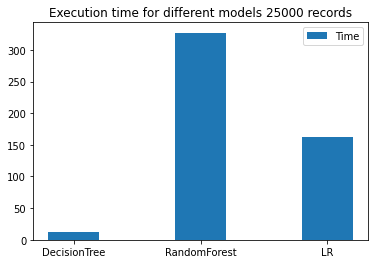

In [ ]:
import matplotlib.pyplot as plt

models = ['DecisionTree','RandomForest','LR']
model_time =[elapsed_time_clf,elapsed_time_rf, elapsed_time_lr]
x_axis = np.arange(len(models))
plt.bar(x_axis, model_time, width=0.4, label = 'Time')

plt.xticks(x_axis, models)
plt.title('Execution time for different models 50000 records')
plt.legend()
plt.show()